This is an EDA project. Dataset and questions are provided by Mr Abhishek Agarrwal in his youtube video. Link: https://www.youtube.com/watch?v=_DAwaQAAG2U&list=PL6_D9USWkG1CuKTolr0FoZMjG91PMiCKp&index=25

Questions: 
1. Import the dataset into the system
2. Show how many rows and columns are present
3. What is a datatype of each column
4. If datatype is different then expected then change it
5. Check for missing values in the dataset
6. Show missing values % in each column
7. Divide the column duration into duration_movie and duration_season
8. Divide column 'listed_in' by genre1, genre2...
9. What is the time period range of this dataset (hint: release_year)
10. How many movies and tv shows are present. Show both count and % of total
11. What type of movies are generally based on according to Genre1
12. What type of TV shows are generally based on according to Genre1
13. Clean the new duration column and remove min and season from numbers
14. What is average time of movie by Genre1
15. What is the average seasons of tv shows by genre1
16. Highest movies and tv shows by Director
17. Which type of genre generally have highest and smallest duration in both movie and tv show
18. Each year how many movie and tv show released
19. Which type ('Movie' or 'TV Show') is releasing more for Genre1
20. How many kids movies and tv shows are released each year
21. Are you seeing a trend change in Genre1 based on movie and tv shows released each year
22. How do you create new column based on hit movie or hit tv show vs average vs flop (base on rating)(create on your own)
23. Which Genre1 has most hit movies
24. Does the Genre1 of hit movies show a trend change


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#1. Import the dataset into the system
dataset = pd.read_csv('amazon_prime_titles.csv')
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,Rating,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,30-Mar-21,2014,NaN,113 min,"Comedy, Drama",5,A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,30-Mar-21,2018,13+,110 min,"Drama, International",8,A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,30-Mar-21,2017,NaN,74 min,"Action, Drama, Suspense",2,After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,30-Mar-21,2014,NaN,69 min,Documentary,5,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,30-Mar-21,1989,NaN,45 min,"Drama, Fantasy",5,Teenage Matt Banting wants to work with a famo...


In [3]:
#2. Show how many rows and columns are present
dataset.shape

(9668, 13)

In [4]:
#3. What is a datatype of each column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  Rating        9668 non-null   int64 
 12  description   9668 non-null   object
dtypes: int64(2), object(11)
memory usage: 982.0+ KB


In [5]:
#4. If datatype is different then expected then change it

#4a. Change show_id to integer by removing letter 's'

dataset['show_id']=dataset['show_id'].str.replace('s', '').astype(int)

#4b. Date_added should be in date format

dataset['date_added']=pd.to_datetime(dataset['date_added'])
dataset['year_added'] = dataset['date_added'].dt.year
dataset['month_added']= dataset['date_added'].dt.month

In [6]:
#5. Check for missing values in the dataset. #Missing Data: Director, Cast, Country, Date_added, rating
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       9668 non-null   int32         
 1   type          9668 non-null   object        
 2   title         9668 non-null   object        
 3   director      7586 non-null   object        
 4   cast          8435 non-null   object        
 5   country       672 non-null    object        
 6   date_added    155 non-null    datetime64[ns]
 7   release_year  9668 non-null   int64         
 8   rating        9331 non-null   object        
 9   duration      9668 non-null   object        
 10  listed_in     9668 non-null   object        
 11  Rating        9668 non-null   int64         
 12  description   9668 non-null   object        
 13  year_added    155 non-null    float64       
 14  month_added   155 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int3

In [7]:
dataset.type.unique()

array(['Movie', 'TV Show'], dtype=object)

In [8]:
#6. Show missing values % in each column
percent_missing = dataset.isnull().sum() * 100 / len(dataset)
missing_value_dataset = pd.DataFrame({'column_name': dataset.columns,
                                 'percent_missing': percent_missing})
print(percent_missing)

show_id          0.000000
type             0.000000
title            0.000000
director        21.534961
cast            12.753413
country         93.049235
date_added      98.396773
release_year     0.000000
rating           3.485726
duration         0.000000
listed_in        0.000000
Rating           0.000000
description      0.000000
year_added      98.396773
month_added     98.396773
dtype: float64


In [9]:
#7. Divide the column duration into duration_movie and duration_season

dataset['duration_season'] = dataset.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else 0, axis = 1)
dataset['duration_movie'] = dataset.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else 0, axis = 1)



In [10]:
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,Rating,description,year_added,month_added,duration_season,duration_movie
0,1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,2014,NaN,113 min,"Comedy, Drama",5,A small fishing village must procure a local d...,2021.0,3.0,0,113
1,2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110 min,"Drama, International",8,A Metro Family decides to fight a Cyber Crimin...,2021.0,3.0,0,110
2,3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021-03-30,2017,NaN,74 min,"Action, Drama, Suspense",2,After a man discovers his wife is cheating on ...,2021.0,3.0,0,74
3,4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2021-03-30,2014,NaN,69 min,Documentary,5,"Pink breaks the mold once again, bringing her ...",2021.0,3.0,0,69
4,5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,2021-03-30,1989,NaN,45 min,"Drama, Fantasy",5,Teenage Matt Banting wants to work with a famo...,2021.0,3.0,0,45


In [11]:
#8. Divide column 'listed_in' by genre1, genre2...

dataset['Genre1'] = dataset['listed_in'].str.split(',', expand=True)[0]
dataset['Genre2'] = dataset['listed_in'].str.split(',', expand=True)[1]
dataset['Genre3'] = dataset['listed_in'].str.split(',', expand=True)[2]
dataset['Genre4'] = dataset['listed_in'].str.split(',', expand=True)[3]
dataset['Genre5'] = dataset['listed_in'].str.split(',', expand=True)[4]

In [12]:
#9. What is the time period range of this dataset (hint: release_year)

dataset_range = range(max(dataset.release_year), min(dataset.release_year))
print(dataset_range)

range(2021, 1920)


In [13]:
    #10. How many movies and tv shows are present. Show both count and % of total

    dataset.type.value_counts()

Movie      7814
TV Show    1854
Name: type, dtype: int64

In [14]:
#10. How many movies and tv shows are present. Show both count and % of total
dataset.type.value_counts(normalize=True)*100


Movie      80.823335
TV Show    19.176665
Name: type, dtype: float64

In [15]:
#11. What type of movies are generally based on according to Genre1

print(dataset[dataset['type']=='Movie']['Genre1'].value_counts())

Drama                        1922
Action                       1502
Comedy                       1253
Documentary                   623
Horror                        522
Arts                          420
Animation                     256
Kids                          254
Suspense                      187
Arthouse                      131
Special Interest              120
Romance                       119
Western                       100
Music Videos and Concerts     100
Fitness                        72
Science Fiction                68
Adventure                      59
International                  37
Fantasy                        16
Anime                          16
Faith and Spirituality         12
LGBTQ                          10
Military and War                5
Sports                          5
Historical                      3
Young Adult Audience            2
Name: Genre1, dtype: int64


In [16]:
#12. What type of TV shows are generally based on according to Genre1

print(dataset[dataset['type']=='TV Show']['Genre1'].value_counts())

Drama                        294
Documentary                  290
TV Shows                     263
Animation                    242
Comedy                       222
Action                       155
Kids                         119
Special Interest              68
Arts                          37
Unscripted                    29
Anime                         28
Science Fiction               17
Sports                        14
Horror                        13
Adventure                     12
Fitness                       11
International                 10
Romance                        7
Suspense                       7
Talk Show and Variety          3
LGBTQ                          3
Music Videos and Concerts      3
Fantasy                        2
Western                        2
Young Adult Audience           1
Arthouse                       1
Faith and Spirituality         1
Name: Genre1, dtype: int64


In [17]:
#13. Clean the new duration column and remove min and season from numbers

dataset['duration_movie'] = dataset['duration_movie'].astype(int)
dataset['duration_season'] = dataset['duration_season'].astype(int)

In [18]:
#14. What is average time of movie by Genre1

dataset.groupby('Genre1').agg({'duration_movie':('mean')})

,duration_movie
Genre1,
Action,91.585395
Adventure,81.619718
Animation,26.632530
Anime,31.227273
Arthouse,91.204545
Arts,67.477024
Comedy,82.231864
Documentary,55.782037
Drama,87.027978


In [19]:
#15. What is the average seasons of tv shows by genre1
dataset.groupby('Genre1').agg({'duration_season':('mean')})

,duration_season
Genre1,
Action,0.161135
Adventure,0.197183
Animation,0.857430
Anime,0.795455
Arthouse,0.007576
Arts,0.113786
Comedy,0.307119
Documentary,0.483023
Drama,0.219765


In [20]:
#16. Highest movies and tv shows by Director
dire = dataset[dataset['type']=='Movie']['director'].value_counts()
print(dire)


Mark Knight              113
Cannis Holder             61
Moonbug Entertainment     37
Jay Chapman               34
Arthur van Merwijk        30
                        ... 
Andrew Traucki             1
Karyn Kusama               1
K. Subash                  1
Robert Cuffley             1
Steve Barker               1
Name: director, Length: 5774, dtype: int64


In [21]:
markk = dataset['director'].str.startswith('Mark')
print(markk)

0       False
1       False
2       False
3       False
4       False
        ...  
9663    False
9664      NaN
9665    False
9666      NaN
9667    False
Name: director, Length: 9668, dtype: object


In [22]:
#16. Highest movies and tv shows by Director ANS: NONE
tvs = dataset[dataset['type']=='TVShow']['director'].value_counts()
print(tvs)

Series([], Name: director, dtype: int64)


<AxesSubplot:xlabel='count', ylabel='Genre1'>

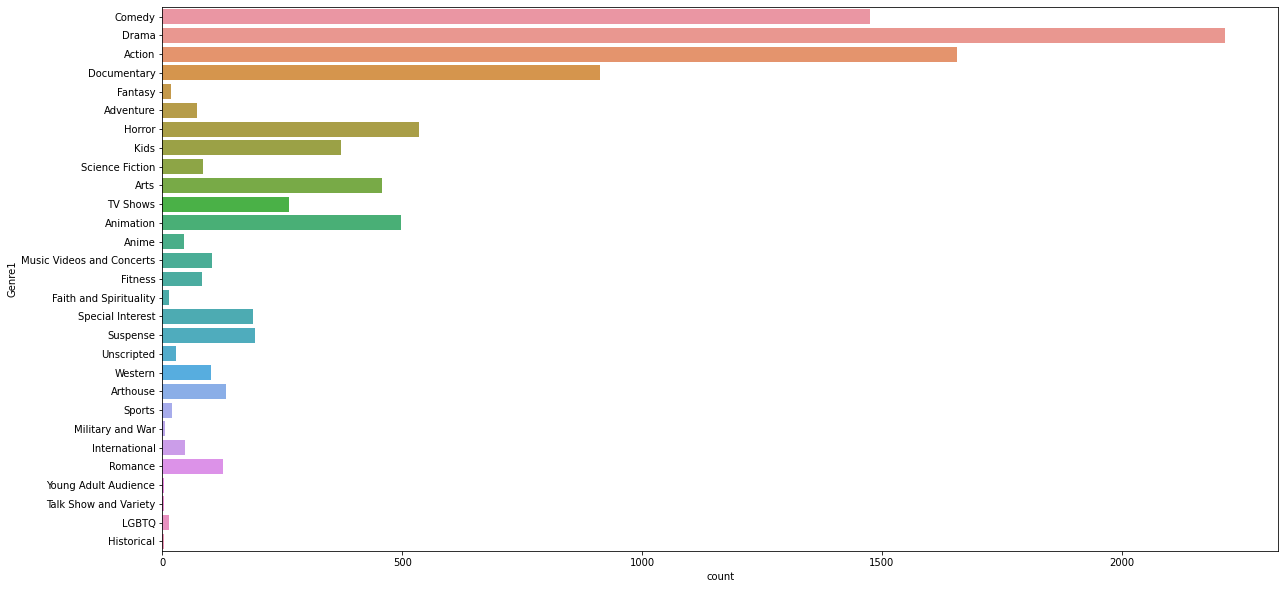

In [23]:
import seaborn as sns
fig = plt.figure(figsize=(20,10))
sns.countplot(y='Genre1', data=dataset)

In [24]:
#17. Which type of genre generally have highest and smallest duration in movie
movie1 = dataset.sort_values('duration_movie', ascending = False)
movie1[['title', 'duration_movie']][:1]

,title,duration_movie
933,Soothing Surf at Del Norte for Sleep black screen,601


In [25]:
movie2 = dataset.sort_values('duration_movie', ascending = True)
movie2 = movie2[movie2['duration_movie'] >= 10]
movie2[['title', 'duration_movie']]

,title,duration_movie
1894,Learn Colors and Race Cars with Max the Glow T...,10
5950,Gretchen - The Tragedy,10
9530,The A Team: Making a Scene,10
9558,Date Night: Making a Scene,10
6340,Dinosaur Park Mission Part 5 - T-Rex Ranch,10
...,...,...
2368,Gentle evening rain,541
2367,Gentle Midnight Rain black screen 9 hours,541
5214,Black Screen Ocean Waves for Sleep 9 hours,541
3850,Himalayan Singing Bowls 9 hours,550


In [26]:
#18. Each year how many movie and tv show released
dataset[dataset['type']=='Movie'].release_year.value_counts()

2021    1139
2020     736
2019     730
2018     438
2017     404
        ... 
1926       2
1922       2
1923       1
1924       1
1927       1
Name: release_year, Length: 100, dtype: int64

In [27]:
#18. Each year how many movie and tv show released

dataset[dataset['type']=='TV Show'].release_year.value_counts()

2021    303
2020    226
2019    199
2018    185
2017    158
2016    119
2014     96
2015     96
2013     62
2012     55
2011     40
2010     34
2008     33
2009     32
2005     21
2007     19
2006     18
2004     14
2003     13
1995     10
1999      9
2001      9
2000      9
2002      9
1998      7
1989      6
1997      6
1978      5
1986      4
1990      4
1992      4
1993      3
1954      3
1991      3
1984      3
1981      3
1974      3
1994      3
1969      2
1985      2
1959      2
1988      2
1963      2
1967      2
1996      2
1932      1
1987      1
1968      1
1946      1
1960      1
1962      1
1955      1
1961      1
1945      1
1972      1
1979      1
1936      1
1975      1
1983      1
Name: release_year, dtype: int64

In [28]:
#19. Which type ('Movie' or 'TV Show') is releasing more for Genre1
dataset.groupby('Genre1')['type'].value_counts()

Genre1                     type   
Action                     Movie      1502
                           TV Show     155
Adventure                  Movie        59
                           TV Show      12
Animation                  Movie       256
                           TV Show     242
Anime                      TV Show      28
                           Movie        16
Arthouse                   Movie       131
                           TV Show       1
Arts                       Movie       420
                           TV Show      37
Comedy                     Movie      1253
                           TV Show     222
Documentary                Movie       623
                           TV Show     290
Drama                      Movie      1922
                           TV Show     294
Faith and Spirituality     Movie        12
                           TV Show       1
Fantasy                    Movie        16
                           TV Show       2
Fitness            

In [29]:
#20. How many kids movies and tv shows are released each year
dataset[dataset['Genre1']=='Kids'].groupby('type').size().reset_index()

,type,0
0,Movie,254
1,TV Show,119


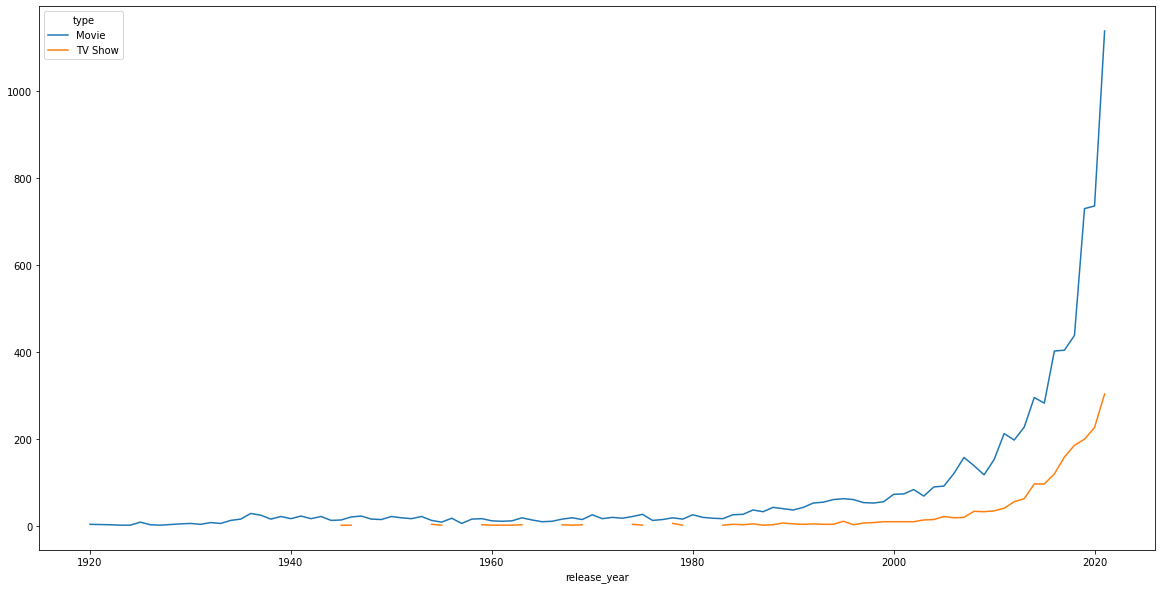

In [31]:
#21. Are you seeing a trend change in Genre1 based on movie and tv shows released each year

df = dataset.groupby(['release_year', 'type']).count()['Genre1']

df.unstack().plot(figsize=(20,10))
plt.show()

In [32]:
#22. How do you create new column based on hit movie or hit tv show vs average vs flop (base on rating)(create on your own)

dataset['Rating'].unique()

array([ 5,  8,  2,  1, 10,  7,  9,  4,  3,  6], dtype=int64)

In [33]:
#22. How do you create new column based on hit movie or hit tv show vs average vs flop (base on rating)(create on your own)

def successtype(value):
    if value <= 3:
        return "Flop"
    if value >= 7:
        return "Hit"
    else:
        return "Average"

dataset['successtype'] = dataset['Rating'].map(successtype)
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,year_added,month_added,duration_season,duration_movie,Genre1,Genre2,Genre3,Genre4,Genre5,successtype
0,1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,2014,NaN,113 min,...,2021.0,3.0,0,113,Comedy,Drama,None,None,None,Average
1,2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110 min,...,2021.0,3.0,0,110,Drama,International,None,None,None,Hit
2,3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021-03-30,2017,NaN,74 min,...,2021.0,3.0,0,74,Action,Drama,Suspense,None,None,Flop
3,4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2021-03-30,2014,NaN,69 min,...,2021.0,3.0,0,69,Documentary,None,None,None,None,Average
4,5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,2021-03-30,1989,NaN,45 min,...,2021.0,3.0,0,45,Drama,Fantasy,None,None,None,Average


In [34]:
#23. Breakdown of TV Shows and Movies 

dataset.groupby(['successtype', 'type']).size()

successtype  type   
Average      Movie      2328
             TV Show     586
Flop         Movie      2347
             TV Show     529
Hit          Movie      3139
             TV Show     739
dtype: int64

In [35]:
#23. Which Genre1 has most hit movies and Tv shows

df1 = dataset[['type','successtype','Genre1']].groupby(['type','successtype','Genre1']).size().reset_index().rename(columns={0:'Count'})

df1[df1['successtype']=='Hit'].sort_values('Count', ascending=False).reset_index()
#dataset[dataset['successtype']=='Hit']['Genre1'].value_counts()

,index,type,successtype,Genre1,Count
0,58,Movie,Hit,Drama,767
1,50,Movie,Hit,Action,602
2,56,Movie,Hit,Comedy,481
3,57,Movie,Hit,Documentary,248
4,62,Movie,Hit,Horror,217
5,55,Movie,Hit,Arts,175
6,129,TV Show,Hit,Documentary,116
7,130,TV Show,Hit,Drama,113
8,64,Movie,Hit,Kids,112
9,143,TV Show,Hit,TV Shows,109


<AxesSubplot:>

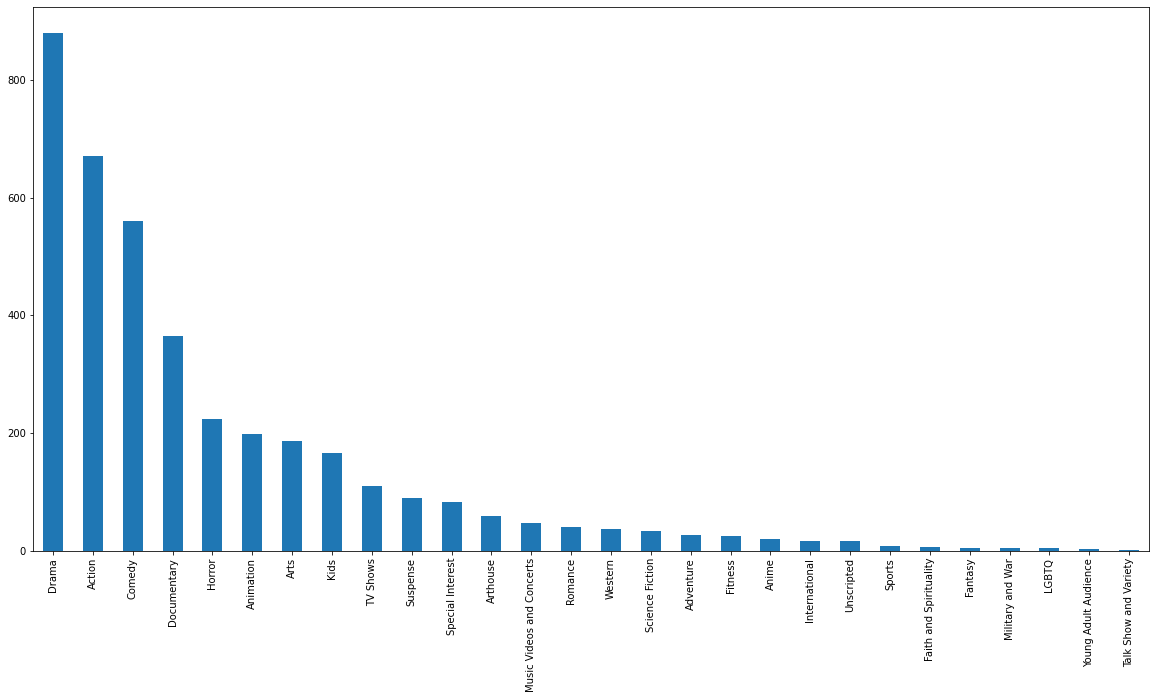

In [36]:
#24. Does the Genre1 of hit movies show a trend change

dataset[dataset['successtype']=='Hit']['Genre1'].value_counts().plot(kind='bar', figsize=(20,10))

In [37]:
#25. What is the average duration of hit movies by Genre1

df2 = dataset[['duration_movie','successtype','Genre1']].groupby(['duration_movie','successtype','Genre1']).size().reset_index().rename(columns={0:'Count'})
df2[df2['successtype']=='Hit'].duration_movie.mean()

86.05165692007797

In [38]:
#26. IS this differ by Country? 22,23,24,25.. Missing values in Country column
df2 = dataset[['duration_movie','successtype','country']].groupby(['duration_movie','successtype','country']).size().reset_index().rename(columns={0:'Count'})
df2[df2['successtype']=='Hit'].duration_movie.mean()

102.64912280701755

In [42]:
dataset.isnull().sum()

show_id               0
type                  0
title                 0
director           2082
cast               1233
country            8996
date_added         9513
release_year          0
rating              337
duration              0
listed_in             0
Rating                0
description           0
year_added         9513
month_added        9513
duration_season       0
duration_movie        0
Genre1                0
Genre2             3839
Genre3             7612
Genre4             9235
Genre5             9345
successtype           0
dtype: int64

<AxesSubplot:xlabel='Genre1,successtype'>

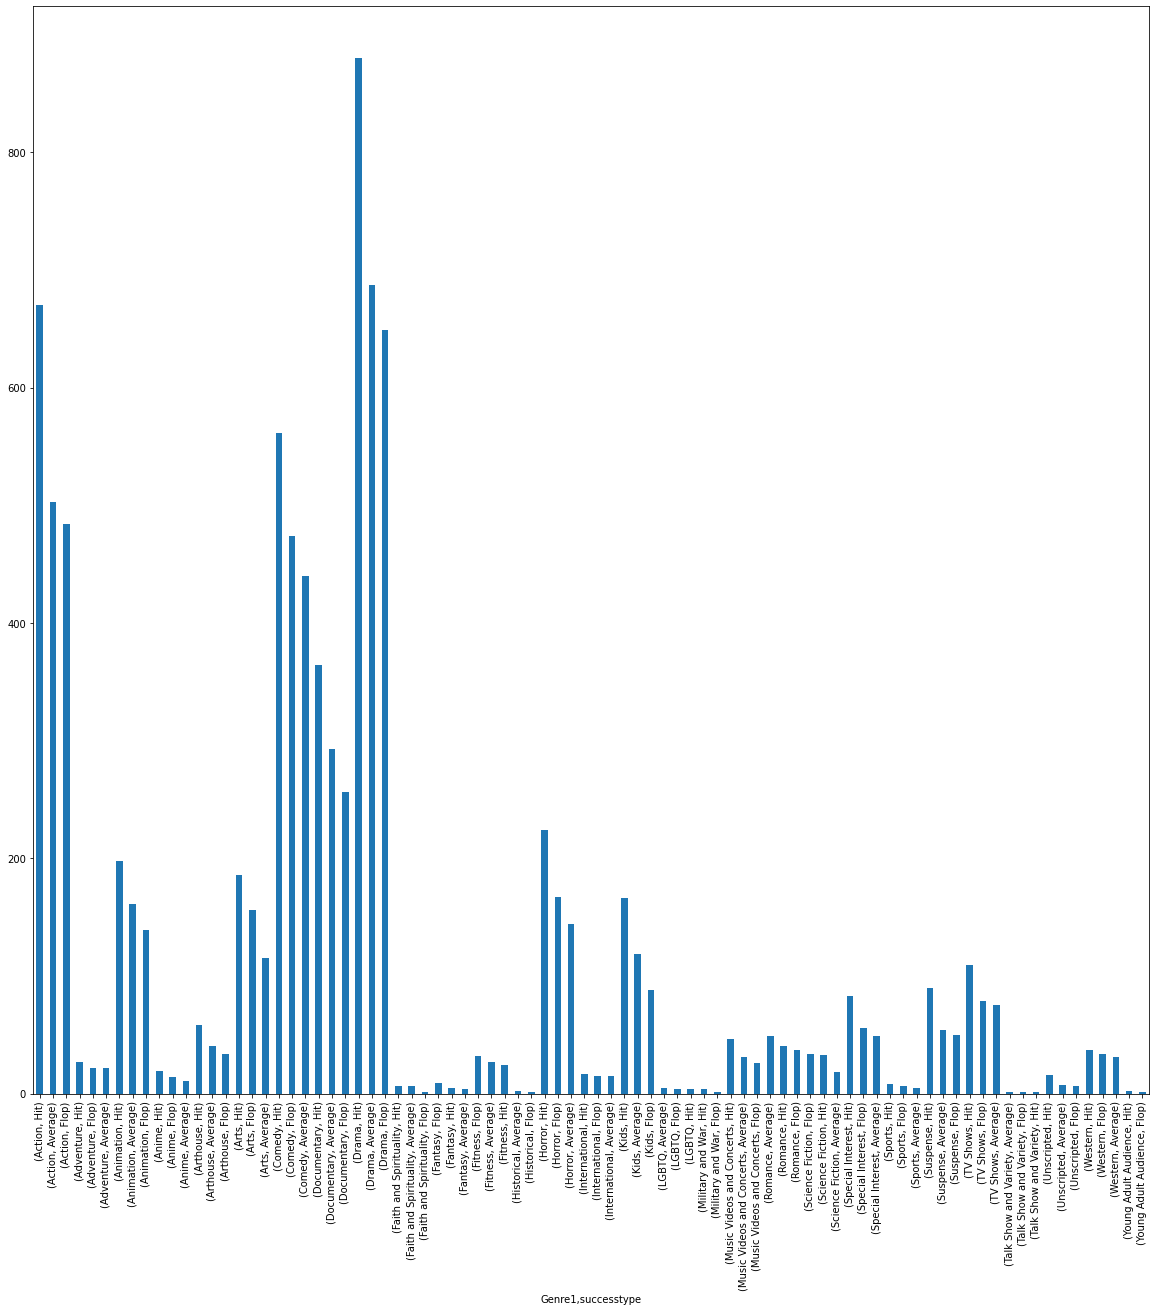

In [40]:
dataset[['Genre1','successtype']].groupby('Genre1').value_counts().plot(kind='bar', figsize=(20,20))

In [41]:
dataset[dataset['successtype']=='Hit']['country'].value_counts()

United States                                             106
India                                                      93
United Kingdom                                             14
United Kingdom, United States                               7
Canada                                                      5
Canada, United States                                       3
United States, United Kingdom                               2
United States, France                                       2
Spain                                                       2
Italy                                                       2
Mexico                                                      2
Japan, France                                               1
United States, Japan, Singapore, South Korea                1
Germany                                                     1
Australia                                                   1
India, United States                                        1
Afghanis